In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_dqn_20k = pd.read_csv('Qbert data - DQN 20k buffer.csv')
df_dqn_40k = pd.read_csv('Qbert data - DQN 40k buffer.csv')
df_doubledqn_20k = pd.read_csv('Qbert data - DoubleDQN 20k buffer.csv')
df_doubledqn_40k = pd.read_csv('Qbert data - DoubleDQN 40k buffer.csv')
df_doubledqn_20k_long = pd.read_csv('Qbert data - DoubleDQN 20k buffer long.csv')
df_doubledqn_20k_long_2 = pd.read_csv('Qbert data - DoubleDQN 20k buffer long 2.csv')

In [3]:
df = {
    'dqn_20k' : df_dqn_20k,
    'dqn_40k' : df_dqn_40k,
    'doubledqn_20k' : df_doubledqn_20k,
    'doubledqn_40k' : df_doubledqn_40k,
    'doubledqn_20k_long' : df_doubledqn_20k_long,
    'doubledqn_20k_long_2' : df_doubledqn_20k_long_2
}

df = { k:v.loc[:,['ep','r']] for k,v in df.items() }

In [4]:
window_size = 10

In [5]:
for k,v in df.items():
    v['rolling_avg'] = v['r'].rolling(window=window_size).mean()

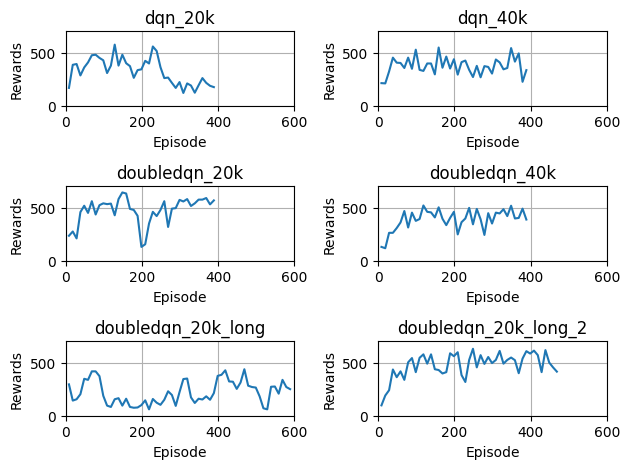

In [30]:
fig,axs = plt.subplots((len(df)+1)//2,2)
if not len(df)%2 == 0:
    fig.delaxes(fig.axes[-1])
df_keys = list(df.keys())
idx = 0
for i,ax in enumerate(fig.axes):
    sns.lineplot(data=df[df_keys[i]][window_size-1::window_size],x='ep',y='rolling_avg',label=k,ax=ax)
    ax.title.set_text(df_keys[i])
    ax.legend([],[],frameon=False)
    ax.set(xlabel='Episode')
    ax.set(ylabel='Rewards')
    ax.set(ylim=(0,700))
    ax.set(xlim=(0,600))
    ax.grid()
    idx += 1
fig.tight_layout()
plt.show()

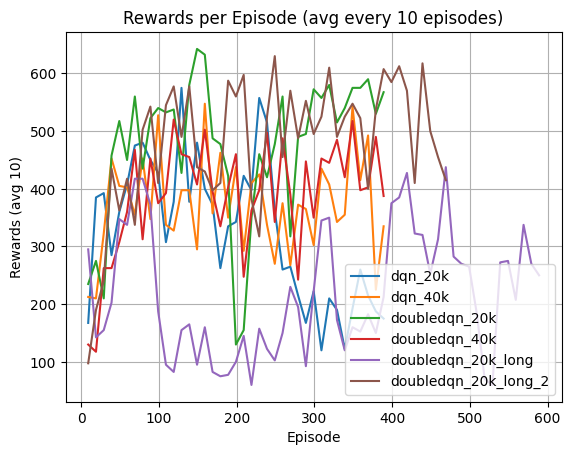

In [7]:
for k,v in df.items():
    sns.lineplot(data=v[window_size-1::window_size],x='ep',y='rolling_avg',label=k)
plt.title('Rewards per Episode (avg every 10 episodes)')
plt.xlabel('Episode')
plt.ylabel('Rewards (avg 10)')
plt.legend()
plt.grid()
plt.show()

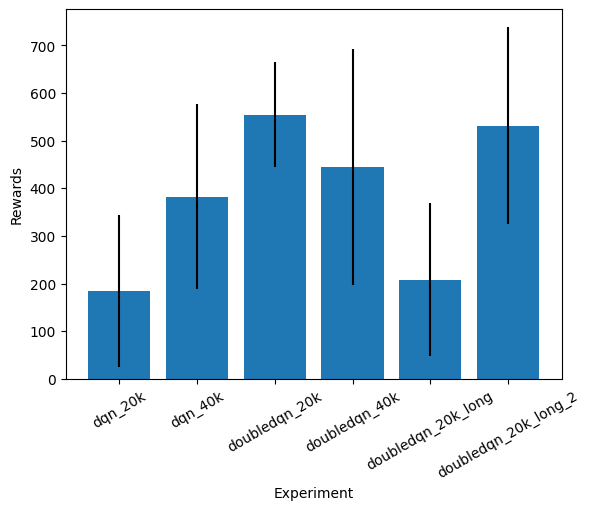

In [33]:
last_m = 100       # last m samples
for k,v in df.items():
    tmp_df = v[-last_m:]['r']
    plt.bar(x=k,height=np.mean(tmp_df),color='tab:blue')
    plt.errorbar(x=k,y=np.mean(tmp_df),yerr=np.std(tmp_df),color='black')
    plt.xticks(rotation=30)
plt.xlabel('Experiment')
plt.ylabel('Rewards')
plt.show()